In [134]:
import pandas as pd

import seaborn as sns

sns.set_context("talk")
import matplotlib.pyplot as plt
import statsmodels

import statsmodels.formula.api as smf
import numpy as np
plt.style.use("ggplot")

In [135]:
data=pd.read_csv('clean_data/final_dataset.csv')

In [136]:
data[['income_census','pop_census']]=np.log(data[['income_census','pop_census']])

In [137]:
data=data.query('nhwrate>0.7 and nativerate<0.025').reset_index(drop=True)

# OLS

## Mormon-> bad outcomes

In [138]:
#https://www.deseretnews.com/article/900008667/utah-is-taking-a-closer-look-at-how-and-what-people-drink-when-it-comes-to-alcohol.html

In [139]:
smf.ols('mortality_alcohol~mormon',data=data).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      mortality_alcohol   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     66.22
Date:                Sun, 23 Dec 2018   Prob (F-statistic):           6.87e-16
Time:                        17:00:09   Log-Likelihood:                -3217.9
No. Observations:                2083   AIC:                             6440.
Df Residuals:                    2081   BIC:                             6451.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4509      0.026     95.939      0.000       2.401       2.501
mormon         0.0021      0.000      8.137      0.000       0.002       0.003
==============================================================================
Omnibus:                      936.575   Durbin-Watson:                   1.381
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6541.797
Skew:                           1.987   Prob(JB):                         0.00
Kurtosis:                      10.719   Cond. No.                         102.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [140]:
#Just income
smf.ols('mortality_alcohol~(income_census)+pov_saipe_2010',data=data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      mortality_alcohol   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     46.26
Date:                Sun, 23 Dec 2018   Prob (F-statistic):           2.21e-20
Time:                        17:00:10   Log-Likelihood:                -3205.2
No. Observations:                2083   AIC:                             6416.
Df Residuals:                    2080   BIC:                             6433.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -14.5165      2.057     -7.057      0.000     -18.551     -10.482
income_census      1.5849      0.196      8.087      0.000       1.201       1.969
pov_saipe_2010     7.4859      0.784      9.545      0.000       5.948       9.024
==============================================================================
Omnibus:                      939.865   Durbin-Watson:                   1.350
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6614.882
Skew:                           1.993   Prob(JB):                         0.00
Kurtosis:                      10.767   Cond. No.                         882.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [141]:
## Controls for income and race
smf.ols('mortality_alcohol~income_census+nhwrate+blkrate+(pop_census)*mormon+nativerate+asianrate+state_mormon+pov_saipe_2010+hisprate',data=data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      mortality_alcohol   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     49.69
Date:                Sun, 23 Dec 2018   Prob (F-statistic):           2.97e-97
Time:                        17:00:10   Log-Likelihood:                -3006.6
No. Observations:                2083   AIC:                             6037.
Df Residuals:                    2071   BIC:                             6105.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -4.1928      3.589     -1.168      0.243     -11.231       2.845
income_census         1.6852      0.216      7.819      0.000       1.263       2.108
nhwrate             -11.8449      2.640     -4.487      0.000     -17.022      -6.668
blkrate             -12.6122      2.688     -4.691      0.000     -17.884      -7.340
pop_census           -0.0140      0.021     -0.655      0.513      -0.056       0.028
mormon                0.0036      0.002      2.324      0.020       0.001       0.007
pop_census:mormon    -0.0004      0.000     -2.571      0.010      -0.001   -9.46e-05
nativerate           55.0493      6.176      8.913      0.000      42.937      67.162
asianrate           -13.1228      3.956     -3.318      0.001     -20.880      -5.365
state_mormon          2.8643      0.650      4.409      0.000       1.590       4.138
pov_saipe_2010        8.1921      0.780     10.507      0.000       6.663       9.721
hisprate             -9.6117      2.704     -3.555      0.000     -14.914      -4.309
==============================================================================
Omnibus:                      754.832   Durbin-Watson:                   1.535
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4351.086
Skew:                           1.598   Prob(JB):                         0.00
Kurtosis:                       9.319   Cond. No.                     3.47e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.47e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [142]:
## Fixed effects
smf.ols('mortality_alcohol~state',data=data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      mortality_alcohol   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     31.97
Date:                Sun, 23 Dec 2018   Prob (F-statistic):          1.51e-210
Time:                        17:00:10   Log-Likelihood:                -2665.1
No. Observations:                2083   AIC:                             5428.
Df Residuals:                    2034   BIC:                             5705.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   1.8082      0.151     11.978      0.000       1.512       2.104
state[T.Alaska]             9.6518      0.893     10.807      0.000       7.900      11.403
state[T.Arizona]            3.2118      0.640      5.015      0.000       1.956       4.468
state[T.Arkansas]           0.1939      0.195      0.995      0.320      -0.188       0.576
state[T.California]         1.5238      0.273      5.585      0.000       0.989       2.059
state[T.Colorado]           1.9187      0.202      9.498      0.000       1.523       2.315
state[T.Connecticut]        0.2118      0.422      0.502      0.616      -0.615       1.039
state[T.Delaware]           0.8718      0.893      0.976      0.329      -0.880       2.623
state[T.Florida]            1.7422      0.202      8.625      0.000       1.346       2.138
state[T.Georgia]            0.8404      0.191      4.406      0.000       0.466       1.214
state[T.Idaho]              1.3256      0.219      6.064      0.000       0.897       1.754
state[T.Illinois]          -0.2766      0.176     -1.570      0.116      -0.622       0.069
state[T.Indiana]            0.1343      0.178      0.754      0.451      -0.215       0.483
state[T.Iowa]               0.3767      0.175      2.150      0.032       0.033       0.720
state[T.Kansas]             1.0970      0.177      6.182      0.000       0.749       1.445
state[T.Kentucky]           0.4845      0.171      2.830      0.005       0.149       0.820
state[T.Louisiana]         -0.1182      0.273     -0.433      0.665      -0.653       0.417
state[T.Maine]              1.4638      0.273      5.365      0.000       0.929       1.999
state[T.Maryland]           0.0018      0.273      0.006      0.995      -0.533       0.537
state[T.Massachusetts]      1.6476      0.296      5.575      0.000       1.068       2.227
state[T.Michigan]           0.9534      0.183      5.217      0.000       0.595       1.312
state[T.Minnesota]          0.8831      0.183      4.832      0.000       0.525       1.242
state[T.Mississippi]        0.2033      0.248      0.819      0.413      -0.283       0.690
state[T.Missouri]           0.2538      0.173      1.471      0.141      -0.085       0.592
state[T.Montana]            2.2054      0.211     10.477      0.000       1.793       2.618
state[T.Nebraska]           0.1677      0.179      0.937      0.349      -0.183       0.519
state[T.Nevada]             3.0598      0.422      7.257      0.000       2.233       3.887
state[T.New Hampshire]      2.2018      0.317      6.953      0.000       1.581       2.823
state[T.New Jersey]         0.0878      0.317      0.277      0.782      -0.533       0.709
state[T.New Mexico]         5.5118      0.640      8.606      0.000       4.256       6.768
state[T.New York]          -0.0469      0.195  

In [143]:
## Fixed effects
model=smf.ols('mortality_alcohol~income_census+nhwrate+blkrate+pop_census*mormon+state+nativerate+asianrate+state_mormon+hisprate',data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      mortality_alcohol   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     32.97
Date:                Sun, 23 Dec 2018   Prob (F-statistic):          4.72e-244
Time:                        17:00:10   Log-Likelihood:                -2566.9
No. Observations:                2083   AIC:                             5250.
Df Residuals:                    2025   BIC:                             5577.
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  16.0156      2.661      6.019      0.000      10.797      21.234
state[T.Alaska]            10.1198      0.868     11.656      0.000       8.417      11.823
state[T.Arizona]            2.6887      0.616      4.363      0.000       1.480       3.897
state[T.Arkansas]           0.1658      0.189      0.879      0.380      -0.204       0.536
state[T.California]         1.4558      0.276      5.281      0.000       0.915       1.996
state[T.Colorado]           2.3407      0.208     11.267      0.000       1.933       2.748
state[T.Connecticut]        0.6600      0.409      1.612      0.107      -0.143       1.463
state[T.Delaware]           0.8296      0.855      0.971      0.332      -0.847       2.506
state[T.Florida]            1.7344      0.194      8.924      0.000       1.353       2.116
state[T.Georgia]            0.9593      0.183      5.242      0.000       0.600       1.318
state[T.Idaho]              1.0972      0.219      5.018      0.000       0.668       1.526
state[T.Illinois]           0.1213      0.173      0.699      0.484      -0.219       0.462
state[T.Indiana]            0.4869      0.176      2.763      0.006       0.141       0.832
state[T.Iowa]               0.8781      0.176      5.002      0.000       0.534       1.222
state[T.Kansas]             1.4425      0.179      8.045      0.000       1.091       1.794
state[T.Kentucky]           0.7332      0.168      4.355      0.000       0.403       1.063
state[T.Louisiana]         -0.1454      0.262     -0.555      0.579      -0.659       0.368
state[T.Maine]              1.8073      0.267      6.778      0.000       1.284       2.330
state[T.Maryland]           0.4156      0.265      1.567      0.117      -0.105       0.936
state[T.Massachusetts]      2.0688      0.293      7.060      0.000       1.494       2.644
state[T.Michigan]           1.0971      0.179      6.112      0.000       0.745       1.449
state[T.Minnesota]          1.2775      0.183      6.971      0.000       0.918       1.637
state[T.Mississippi]        0.2263      0.239      0.947      0.344      -0.243       0.695
state[T.Missouri]           0.4614      0.170      2.708      0.007       0.127       0.796
state[T.Montana]            2.5032      0.209     11.979      0.000       2.093       2.913
state[T.Nebraska]           0.6864      0.181      3.785      0.000       0.331       1.042
state[T.Nevada]             2.7637      0.414      6.668      0.000       1.951       3.577
state[T.New Hampshire]      2.7357      0.310      8.831      0.000       2.128       3.343
state[T.New Jersey]         0.5825      0.311      1.871      0.061      -0.028       1.193
state[T.New Mexico]         5.6883      0.624      9.115      0.000       4.465       6.912
state[T.New York]           0.2213      0.191  

Text(0, 0.5, 'Predicted mortality')

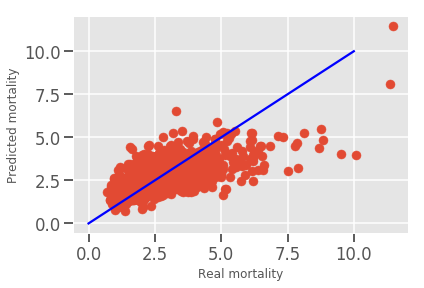

In [144]:
## How good is this?
plt.scatter(data.mortality_alcohol,model.predict(data))
plt.plot([0,10],[0,10],color='blue')
plt.xlabel('Real mortality')
plt.ylabel('Predicted mortality')

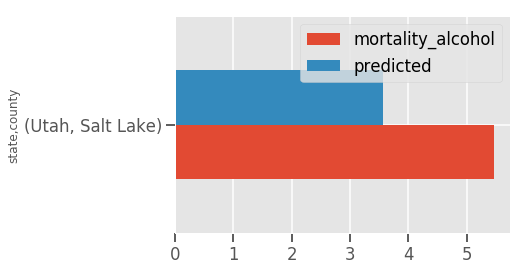

In [145]:
X = data[data.county.str.contains("Salt Lake|Fairfax|District")]
predicted = model.predict(X)
X[["mortality_alcohol", "state", "county"]].assign(predicted=predicted).set_index(
    ["state", "county"]
).plot.barh()

In [146]:
## Same on saipe
model=smf.ols('mortality_alcohol~(income_census)+nhwrate+blkrate+(pop_census)*mormon+state+nativerate+asianrate+state_mormon+pov_saipe_2010+hisprate',data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      mortality_alcohol   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     35.23
Date:                Sun, 23 Dec 2018   Prob (F-statistic):          5.20e-261
Time:                        17:00:10   Log-Likelihood:                -2523.6
No. Observations:                2083   AIC:                             5165.
Df Residuals:                    2024   BIC:                             5498.
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.0790      3.124      0.025      0.980      -6.047       6.205
state[T.Alaska]            10.3329      0.851     12.143      0.000       8.664      12.002
state[T.Arizona]            2.5112      0.604      4.157      0.000       1.327       3.696
state[T.Arkansas]           0.2738      0.185      1.478      0.139      -0.089       0.637
state[T.California]         1.3899      0.270      5.145      0.000       0.860       1.920
state[T.Colorado]           2.3608      0.204     11.599      0.000       1.962       2.760
state[T.Connecticut]        0.8324      0.402      2.073      0.038       0.045       1.620
state[T.Delaware]           0.8696      0.837      1.038      0.299      -0.773       2.512
state[T.Florida]            1.7196      0.190      9.031      0.000       1.346       2.093
state[T.Georgia]            1.0944      0.180      6.084      0.000       0.742       1.447
state[T.Idaho]              1.1558      0.214      5.393      0.000       0.735       1.576
state[T.Illinois]           0.3378      0.172      1.969      0.049       0.001       0.674
state[T.Indiana]            0.7066      0.174      4.055      0.000       0.365       1.048
state[T.Iowa]               1.1261      0.174      6.470      0.000       0.785       1.467
state[T.Kansas]             1.6836      0.178      9.481      0.000       1.335       2.032
state[T.Kentucky]           0.6785      0.165      4.111      0.000       0.355       1.002
state[T.Louisiana]          0.0001      0.257      0.000      1.000      -0.504       0.504
state[T.Maine]              1.9303      0.262      7.380      0.000       1.417       2.443
state[T.Maryland]           0.5440      0.260      2.090      0.037       0.034       1.054
state[T.Massachusetts]      2.1132      0.287      7.359      0.000       1.550       2.676
state[T.Michigan]           1.1785      0.176      6.693      0.000       0.833       1.524
state[T.Minnesota]          1.5623      0.182      8.577      0.000       1.205       1.920
state[T.Mississippi]        0.3275      0.234      1.397      0.163      -0.132       0.787
state[T.Missouri]           0.5988      0.168      3.573      0.000       0.270       0.927
state[T.Montana]            2.5554      0.205     12.477      0.000       2.154       2.957
state[T.Nebraska]           0.9491      0.180      5.274      0.000       0.596       1.302
state[T.Nevada]             2.8053      0.406      6.908      0.000       2.009       3.602
state[T.New Hampshire]      2.8927      0.304      9.516      0.000       2.297       3.489
state[T.New Jersey]         0.7161      0.305      2.345      0.019       0.117       1.315
state[T.New Mexico]         5.7113      0.611      9.342      0.000       4.512       6.910
state[T.New York]           0.3661      0.188  

In [147]:
## Same on saipe, no FE
model=smf.ols('mortality_alcohol~(income_census)+nhwrate+blkrate+(pop_census)*mormon+nativerate+asianrate+state_mormon+pov_saipe_2010+hisprate',data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      mortality_alcohol   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     49.69
Date:                Sun, 23 Dec 2018   Prob (F-statistic):           2.97e-97
Time:                        17:00:10   Log-Likelihood:                -3006.6
No. Observations:                2083   AIC:                             6037.
Df Residuals:                    2071   BIC:                             6105.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -4.1928      3.589     -1.168      0.243     -11.231       2.845
income_census         1.6852      0.216      7.819      0.000       1.263       2.108
nhwrate             -11.8449      2.640     -4.487      0.000     -17.022      -6.668
blkrate             -12.6122      2.688     -4.691      0.000     -17.884      -7.340
pop_census           -0.0140      0.021     -0.655      0.513      -0.056       0.028
mormon                0.0036      0.002      2.324      0.020       0.001       0.007
pop_census:mormon    -0.0004      0.000     -2.571      0.010      -0.001   -9.46e-05
nativerate           55.0493      6.176      8.913      0.000      42.937      67.162
asianrate           -13.1228      3.956     -3.318      0.001     -20.880      -5.365
state_mormon          2.8643      0.650      4.409      0.000       1.590       4.138
pov_saipe_2010        8.1921      0.780     10.507      0.000       6.663       9.721
hisprate             -9.6117      2.704     -3.555      0.000     -14.914      -4.309
==============================================================================
Omnibus:                      754.832   Durbin-Watson:                   1.535
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4351.086
Skew:                           1.598   Prob(JB):                         0.00
Kurtosis:                       9.319   Cond. No.                     3.47e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.47e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

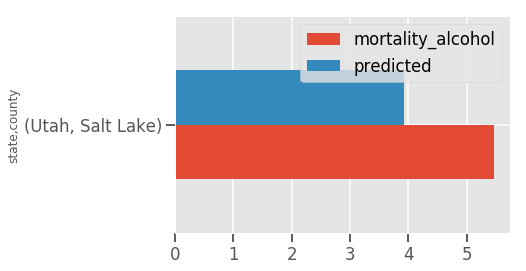

In [148]:
X = data[data.county.str.contains("Salt Lake|Fairfax|District")]
predicted = model.predict(X)
X[["mortality_alcohol", "state", "county"]].assign(predicted=predicted).set_index(
    ["state", "county"]
).plot.barh()

In [149]:
#Does adding all the other religions help?
## Same on saipe
model=smf.ols('mortality_alcohol~(income_census)+nhwrate+blkrate+(pop_census)*mormon'
              '+state+nativerate+asianrate+state_mormon+b_protes+catholic+e_protes+m_protes+'
              'south_baptist+o_jew+muslim+pov_saipe_2010+hisprate',data=data).fit()
model.summary()
#A bit, Loglikelihood,R2 went up, BIC is a bit petter

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      mortality_alcohol   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     31.71
Date:                Sun, 23 Dec 2018   Prob (F-statistic):          3.02e-258
Time:                        17:00:11   Log-Likelihood:                -2517.3
No. Observations:                2083   AIC:                             5167.
Df Residuals:                    2017   BIC:                             5539.
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   1.1643      3.144      0.370      0.711      -5.002       7.331
state[T.Alaska]            10.2691      0.855     12.010      0.000       8.592      11.946
state[T.Arizona]            2.4379      0.608      4.013      0.000       1.246       3.629
state[T.Arkansas]           0.2579      0.188      1.373      0.170      -0.111       0.626
state[T.California]         1.3008      0.282      4.619      0.000       0.749       1.853
state[T.Colorado]           2.3136      0.217     10.686      0.000       1.889       2.738
state[T.Connecticut]        0.6665      0.411      1.623      0.105      -0.139       1.472
state[T.Delaware]           0.7383      0.841      0.878      0.380      -0.910       2.387
state[T.Florida]            1.6553      0.198      8.355      0.000       1.267       2.044
state[T.Georgia]            1.0928      0.182      5.992      0.000       0.735       1.450
state[T.Idaho]              1.1001      0.224      4.922      0.000       0.662       1.538
state[T.Illinois]           0.2106      0.186      1.134      0.257      -0.153       0.575
state[T.Indiana]            0.6004      0.191      3.144      0.002       0.226       0.975
state[T.Iowa]               0.8989      0.199      4.518      0.000       0.509       1.289
state[T.Kansas]             1.5059      0.198      7.620      0.000       1.118       1.893
state[T.Kentucky]           0.6411      0.167      3.831      0.000       0.313       0.969
state[T.Louisiana]         -0.0867      0.262     -0.331      0.741      -0.601       0.428
state[T.Maine]              1.8095      0.275      6.579      0.000       1.270       2.349
state[T.Maryland]           0.4184      0.272      1.540      0.124      -0.114       0.951
state[T.Massachusetts]      1.9250      0.303      6.348      0.000       1.330       2.520
state[T.Michigan]           1.0452      0.195      5.357      0.000       0.663       1.428
state[T.Minnesota]          1.3084      0.209      6.260      0.000       0.899       1.718
state[T.Mississippi]        0.3258      0.237      1.376      0.169      -0.139       0.790
state[T.Missouri]           0.5336      0.173      3.087      0.002       0.195       0.873
state[T.Montana]            2.4305      0.222     10.955      0.000       1.995       2.866
state[T.Nebraska]           0.7556      0.203      3.716      0.000       0.357       1.154
state[T.Nevada]             2.7632      0.413      6.689      0.000       1.953       3.573
state[T.New Hampshire]      2.7602      0.316      8.743      0.000       2.141       3.379
state[T.New Jersey]         0.6207      0.328      1.890      0.059      -0.023       1.265
state[T.New Mexico]         5.6555      0.613      9.221      0.000       4.453       6.858
state[T.New York]           0.1842      0.210  

## Conclusion
For fixed effects model:
* Mormon coefficient for pov_saipe_2010=0.0002 (p=0.028)
* Mormon coefficient for state_mormon=0.0739 (p<0.001)



# Predicting with XGBoost
XGBoost is a library that enables one to train gradient boosted trees, which should better capture odd nonlinearities present in the data.

It has many parameters to tune, so I leave it in the bands of BayesSearchCV to find the optimal ones. It will try a combination of parameters, run a 5-fold CV to estimate accuracy, and then make a guess about what the best combinations of parameters is, up to 100 times.

In [150]:
import xgboost as xgb

X_plain = data[
    [
        "state",
        "mormon",
        "pop_census",
        "income_census",
        "nhwrate",
        "blkrate",
        "hisprate",
        "nativerate",
        "asianrate",
        "state_mormon",
        "b_protes",
        "catholic",
        "e_protes",
        "m_protes",
        "south_baptist",
        "o_jew",
        "muslim",
        "pov_saipe_2010"
    ]
]
y = data.mortality_alcohol
st_dummie = pd.get_dummies(data.state)
X = pd.concat([X_plain.drop(columns="state"), st_dummie], axis=1)

In [151]:
# https://www.kaggle.com/nikitpatel/random-grid-bayes-search-cv-for-xgb
from skopt import BayesSearchCV
from sklearn.model_selection import KFold

ITERATIONS = 40


def get_bayes_tuner(estimator, search_space):
    return BayesSearchCV(
        estimator=estimator,
        search_spaces=search_space,
        cv=KFold(n_splits=20, shuffle=True, random_state=42),
        n_jobs=6,
        n_iter=ITERATIONS,
        verbose=0,
        refit=True,
        random_state=42,
    )

In [152]:
result = get_bayes_tuner(xgb.XGBRegressor(n_jobs=2, silent=1),{
        'learning_rate': (0.01, 1.0, 'log-uniform'),
        'min_child_weight': (0, 10),
        'max_depth': (0, 12),       
        'subsample': (0.5, 1.0, 'uniform'),
        'colsample_bytree': (0.3, 1.0, 'uniform'),
        'colsample_bylevel': (0.5, 1.0, 'uniform'),
        'n_estimators': (50, 100,120)
    }).fit(
    X, y
)

In [153]:
#True score
result.best_score_

0.41678039267548106

In [154]:
#Fake score because we are training on the whole set
result.score(X,y)

0.9734501568382938

[<matplotlib.lines.Line2D at 0x7f8c400dc908>]

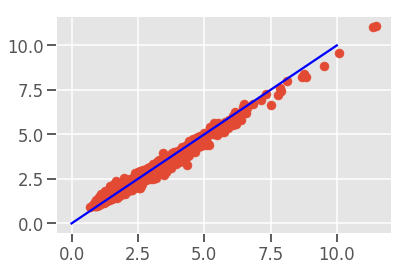

In [155]:
plt.scatter(y,result.predict(X))
plt.plot([0,10],[0,10],color='blue')

In [156]:
result.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
       colsample_bytree=1.0, gamma=0, learning_rate=0.08260552504948611,
       max_delta_step=0, max_depth=9, min_child_weight=0, missing=None,
       n_estimators=120, n_jobs=2, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=1, subsample=0.7065353910839124)

In [167]:
pd.options.display.max_columns=9999
pd.DataFrame(result.cv_results_).sort_values('mean_test_score',ascending=False)

,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,split15_test_score,split16_test_score,split17_test_score,split18_test_score,split19_test_score,mean_test_score,std_test_score,rank_test_score,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bylevel,param_colsample_bytree,param_learning_rate,param_max_depth,param_min_child_weight,param_n_estimators,param_subsample,params
35,0.325892,0.527137,0.394571,0.459234,0.492020,0.511905,0.461676,0.280444,0.261059,0.344933,0.471444,0.441165,0.511459,0.545193,0.294679,0.436470,0.330207,0.438739,0.424561,0.382845,0.416780,0.083958,1,0.713266,0.138963,0.002358,0.000276,0.500000,1.000000,0.082606,9,0,120,0.706535,"{'colsample_bylevel': 0.5, 'colsample_bytree':..."
17,0.379993,0.548205,0.315079,0.439277,0.476704,0.547103,0.420443,0.279337,0.362866,0.317172,0.481536,0.460341,0.439647,0.544210,0.253929,0.425204,0.329908,0.413510,0.430337,0.446772,0.415577,0.083640,1,0.806289,0.126983,0.002457,0.000302,0.719735,0.794485,0.064068,12,2,100,0.788333,"{'colsample_bylevel': 0.7197353281928189, 'col..."
36,0.380750,0.496295,0.415619,0.469964,0.523107,0.576413,0.447399,0.212375,0.342634,0.350812,0.449403,0.348846,0.464431,0.506787,0.264505,0.477895,0.340247,0.443639,0.422039,0.376141,0.415487,0.086851,1,0.663573,0.091243,0.002316,0.000303,0.500000,1.000000,0.079617,9,0,120,0.635090,"{'colsample_bylevel': 0.5, 'colsample_bytree':..."
39,0.317826,0.566188,0.432281,0.406228,0.489295,0.539013,0.447721,0.182140,0.377521,0.321069,0.481388,0.487768,0.448845,0.533333,0.235305,0.448421,0.267136,0.417382,0.447728,0.434711,0.414101,0.100173,1,0.695341,0.105630,0.002399,0.000524,0.571981,0.955946,0.070744,9,1,120,1.000000,"{'colsample_bylevel': 0.5719807064796103, 'col..."
37,0.340191,0.556102,0.417325,0.402920,0.483572,0.542962,0.437484,0.269366,0.299823,0.342731,0.464991,0.432723,0.435686,0.583729,0.285258,0.422842,0.317919,0.398709,0.454306,0.368395,0.412888,0.086282,1,0.720969,0.100630,0.002506,0.000403,0.545771,1.000000,0.079501,9,0,120,0.715719,"{'colsample_bylevel': 0.5457705961290572, 'col..."
21,0.361161,0.567833,0.364467,0.454436,0.479380,0.531658,0.479077,0.247209,0.358833,0.305615,0.467445,0.361226,0.439283,0.540898,0.290686,0.479069,0.305392,0.381758,0.426980,0.364171,0.410359,0.087353,1,0.825823,0.155139,0.002799,0.000939,0.500000,1.000000,0.058723,12,0,100,0.774203,"{'colsample_bylevel': 0.5, 'colsample_bytree':..."
6,0.384410,0.580282,0.370126,0.431962,0.493521,0.509221,0.429463,0.306157,0.324484,0.359661,0.495719,0.335136,0.435887,0.568228,0.246185,0.410835,0.316938,0.376132,0.415238,0.406125,0.409836,0.085144,1,0.652696,0.109015,0.002181,0.000326,0.808540,0.842755,0.052245,10,6,100,0.824389,"{'colsample_bylevel': 0.8085396792511581, 'col..."
25,0.378019,0.531469,0.391814,0.445445,0.467944,0.459994,0.428982,0.323960,0.345107,0.345665,0.487669,0.371536,0.430884,0.531171,0.293699,0.393970,0.279060,0.380328,0.383860,0.488601,0.407996,0.070910,1,0.546875,0.084882,0.002490,0.000340,0.695758,0.581924,0.092883,9,9,120,0.708028,"{'colsample_bylevel': 0.6957575006687613, 'col..."
31,0.417026,0.514747,0.383641,0.424624,0.482873,0.529880,0.378653,0.319977,0.350172,0.347496,0.501122,0.370986,0.379312,0.498473,0.312849,0.460941,0.346399,0.258370,0.415804,0.448177,0.407121,0.073189,1,0.366767,0.061723,0.002223,0.000286,0.500000,0.455402,0.074412,9,9,120,0.659984,"{'colsample_bylevel': 0.5, 'colsample_bytree':..."
33,0.534580,0.537076,0.390394,0.395703,0.484396,0.535012,0.420409,0.266763,0.389875,0.331626,0.398599,0.341761,0.385374,0.532483,0.249137,0.445300,0.347318,0.310401,0.360230,0.454169,0.405648,0.085471,1,0.392142,0.074164,0.002409,0.000591,0.860782,0.300000,0.087709,9,5,120,0.532835,"{'colsample_bylevel': 0.860781633097195, 'cols..."


In [169]:
xgb_opt=xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
       colsample_bytree=1.0, gamma=0, learning_rate=0.08260552504948611,
       max_delta_step=0, max_depth=9, min_child_weight=0, missing=None,
       n_estimators=120, n_jobs=2, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=1, subsample=0.7065353910839124)
xgb_opt.fit(X,y)
xgb_opt.score(X,y)

0.9734501568382938

<Figure size 864x1008 with 0 Axes>

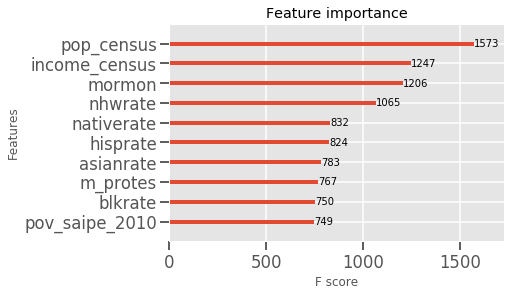

In [168]:
plt.figure(figsize=(12,14))
xgb.plot_importance(xgb_opt,max_num_features=10)

These feature importances are fake news because of multicollinearity issues (religiosity is collinear with the religion variables, for example), so we turn to SHAP to see what features drive this model.

[SHAP](https://arxiv.org/pdf/1705.07874.pdf) produces a score for each pair of (feature,sample), indicating how much that feature contributed in that particular case. In effect SHAP is solving a credit assignment problem.

Unlike with the coefficients in OLS, here we have scores per pair of features, which make it more important to visualise what is going on on a case by case basis to see if trends emerge

In [170]:
import shap
shap.initjs()

In [171]:
explainer=shap.TreeExplainer(xgb_opt)
shaps=explainer.shap_values(X)

In [172]:
#Model prediction: What happens if

'Position is 1818'

,Baseline,Predicted,NM County,NM State,NM State&County,No Religion
0,5.47,5.2916,4.721626,2.569639,3.045174,2.947859


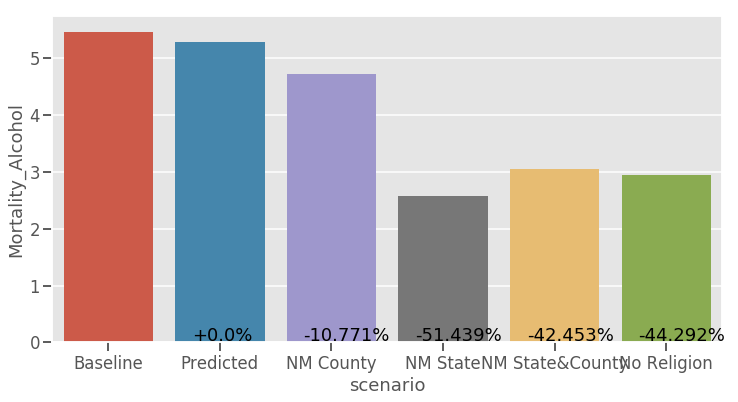

In [173]:
def plot_mormon_change(county, state,variable='mortality_alcohol'):
    sns.set_context("talk")
    plt.figure(figsize=(12, 6))
    data_salt = data.query("county==@county and state==@state")
    salt = X.loc[data_salt.index[0]].to_frame().T
    display(f'Position is {data_salt.index[0]}')
    baseline = data_salt[variable].values[0]
    predicted = xgb_opt.predict(salt)
    # No mormons
    nomormons = salt.assign(mormon=0)
    # No mormons in the state
    nostatemormon = salt.assign(state_mormon=0)
    # Both, plus no religiosity
    both = salt.assign(mormon=0, state_mormon=0)
    # No religion
    noreligion= salt.assign(
        mormon=0,
        state_mormon=0,
        muslim=0,
        catholic=0,
        e_protes=0,
        b_protes=0,
        m_protes=0,
        south_baptist=0,
        o_jew=0,
    )
    predicted_nomorm = xgb_opt.predict(nomormons)
    predicted_both = xgb_opt.predict(both)
    predicted_nostatemormon = xgb_opt.predict(nostatemormon)
    predicted_norel = xgb_opt.predict(noreligion)
    k = pd.DataFrame(
        {
            "Baseline": baseline,
            "Predicted": predicted,
            "NM County": predicted_nomorm,
            "NM State": predicted_nostatemormon,
            "NM State&County": predicted_both,
            "No Religion": predicted_norel,
        }
    )
    display(k)
    sns.barplot(x="scenario", y="value", data=k.melt(var_name="scenario"))
    plt.ylabel(variable.title())
    for pos, col in enumerate(k):
        if col == "Baseline":
            continue
        delta_predicted = np.round(
            100 * (k.at[0, col] - k.at[0, "Predicted"]) / k.at[0, "Predicted"], 3
        )
        string = f"{str(delta_predicted)}%"
        if "-" not in string:
            string = "+" + string
        plt.annotate(string, xy=(pos - 0.25, 0.02))


plot_mormon_change("Salt Lake", "Utah")

In [174]:
data.reset_index().query('county=="Salt Lake"')

,index,state,county,povrate,pop_census,income_census,nhwrate,blkrate,asianrate,nativerate,hisprate,b_protes,catholic,e_protes,m_protes,mormon,south_baptist,o_jew,muslim,pop2010,religiosity,pov_saipe_2010,pov_saipe_2017,mortality_alcohol,mortality_drug_us,mortality_self_ha,mortality_interpe,mortality,outcomes,state_mormon
1818,1818,Utah,Salt Lake,0.102685,13.801038,10.12827,0.75217,0.01358,0.032191,0.006697,0.16245,1.26,81.908889,26.71,12.42,593.25,4.888889,0.1,4.41,1029655.0,0.732371,0.137,0.092,5.47,9.98,25.39,3.67,0.236136,0.220286,0.689507


In [175]:
#Salt Lake City
shap.force_plot(explainer.expected_value,shaps[1984,:],X.loc[1984,:])

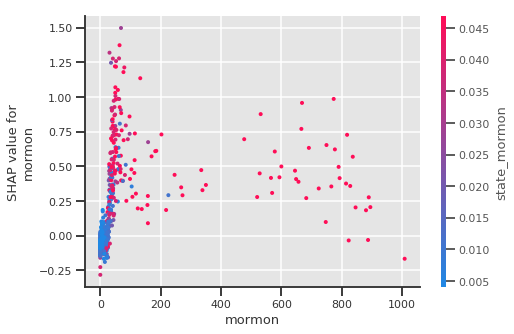

In [176]:
shap.dependence_plot("mormon", shaps,X)

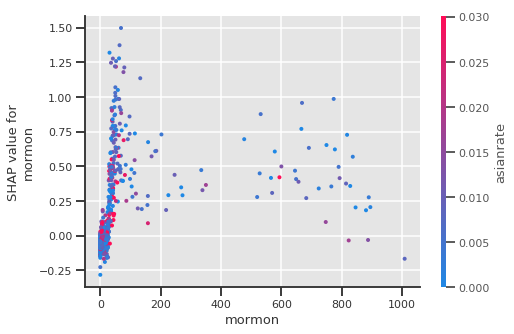

In [177]:
#All the mormons driving the correlation are in Mormon states
shap.dependence_plot("mormon", shaps,X,interaction_index=7)

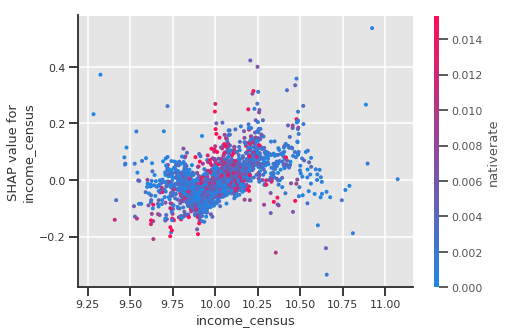

In [178]:
shap.dependence_plot("income_census", shaps, X)

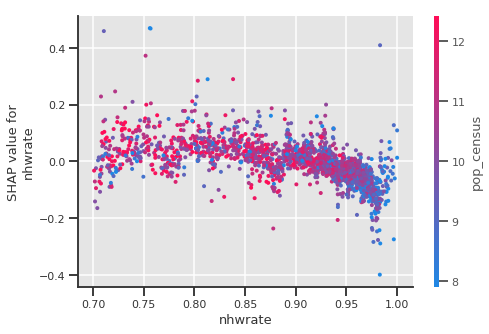

In [179]:
shap.dependence_plot("nhwrate", shaps, X)

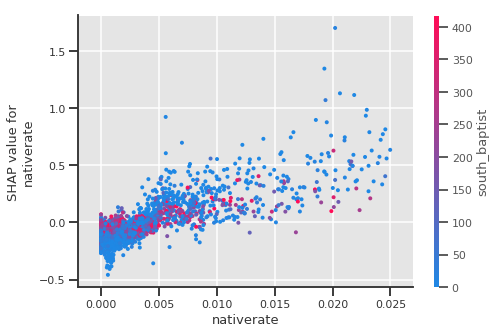

In [180]:
shap.dependence_plot("nativerate", shaps, X)

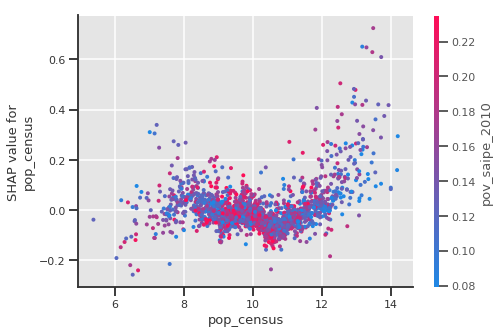

In [181]:
shap.dependence_plot("pop_census", shaps, X)

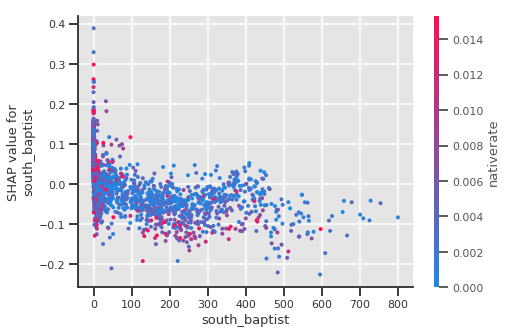

In [182]:
shap.dependence_plot("south_baptist", shaps, X)

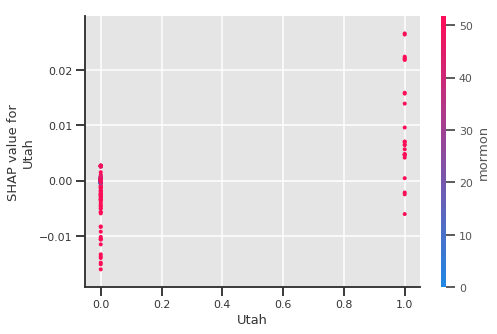

In [183]:
shap.dependence_plot("Utah", shaps, X)

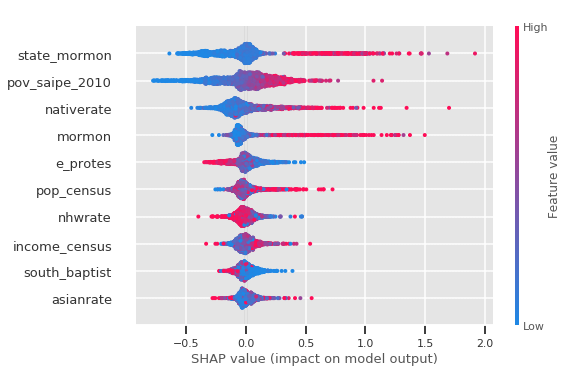

In [184]:
# This plot measures the impact of a variable on poverty. Each point is a particular county.
# The y-size of each row represents the density of points at that particular point
# High SHAP values mean in that case the variable in that case contributed to a higher poverty rate
# The sense in which it contributed can be glanced from the colorbar
# For example, the blue points in income_census mean that when income was low, the SHAP value was high (higher poverty)
# Positive values mean that in that part
shap.summary_plot(shaps,X,max_display=10)

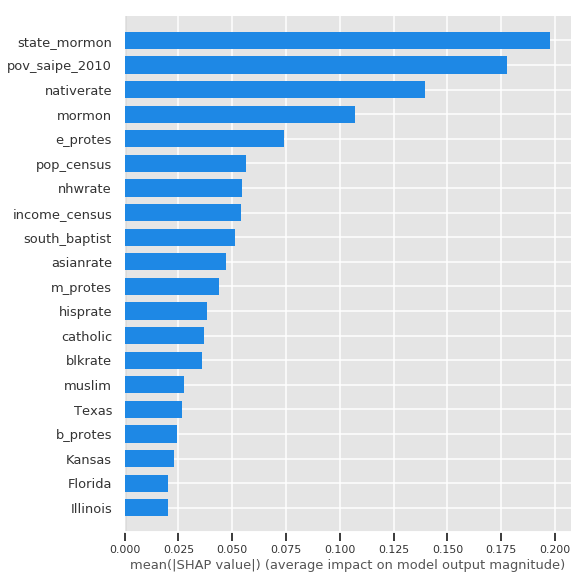

In [185]:
shap.summary_plot(shaps, X, plot_type="bar")

In [186]:
def plot_mortality(data,mort):
    t = data[["county", "state", "mormon", f"mortality_{mort}"]]
    t.plot.scatter("mormon", f"mortality_{mort}")
    plt.axhline(t[f"mortality_{mort}"].mean())
    plt.axhline(t[f"mortality_{mort}"].median())

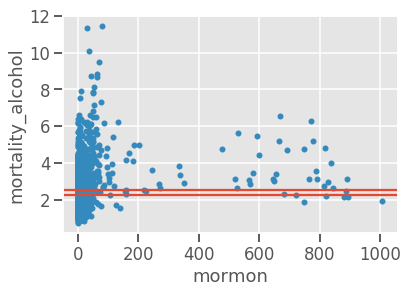

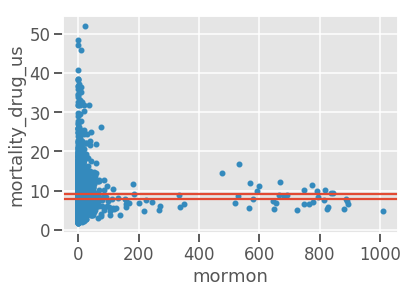

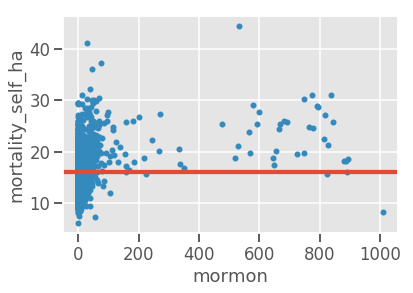

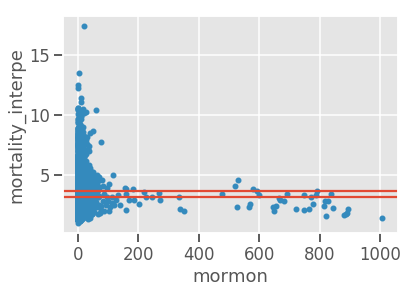

In [187]:
for i in ['alcohol','drug_us','self_ha','interpe']:
    plot_mortality(data,i)

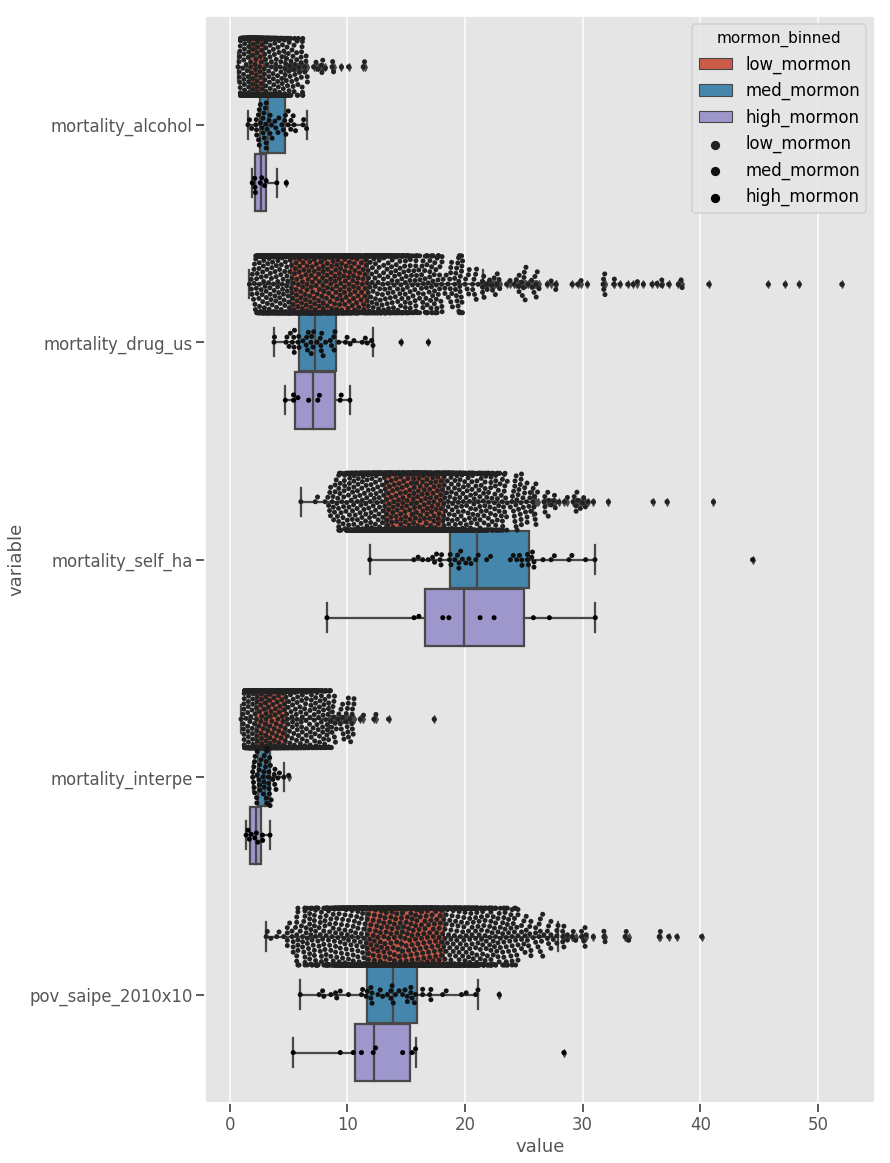

In [188]:
def cut(x):
    ret = np.where(
        x < 100, "low_mormon", np.where(x < 800, "med_mormon", "high_mormon")
    )
    return ret


# Best counties
t = (
    data.assign(
        mormon_binned=cut(data.mormon), pov_saipe_2010x10=data.pov_saipe_2010 * 100
    )
    .query("nhwrate>0.7")[
        [
            "mormon_binned",
            "mortality_alcohol",
            "mortality_drug_us",
            "mortality_self_ha",
            "mortality_interpe",
            "pov_saipe_2010x10",
        ]
    ]
    .sample(2000)
    .melt(id_vars="mormon_binned")
)
plt.figure(figsize=(12, 20))
sns.boxplot(y="variable", x="value", hue="mormon_binned", data=t)
sns.swarmplot(
    y="variable",
    x="value",
    hue="mormon_binned",
    data=t,
    dodge=True,
  
    color=".0",
    linewidth=0,
)

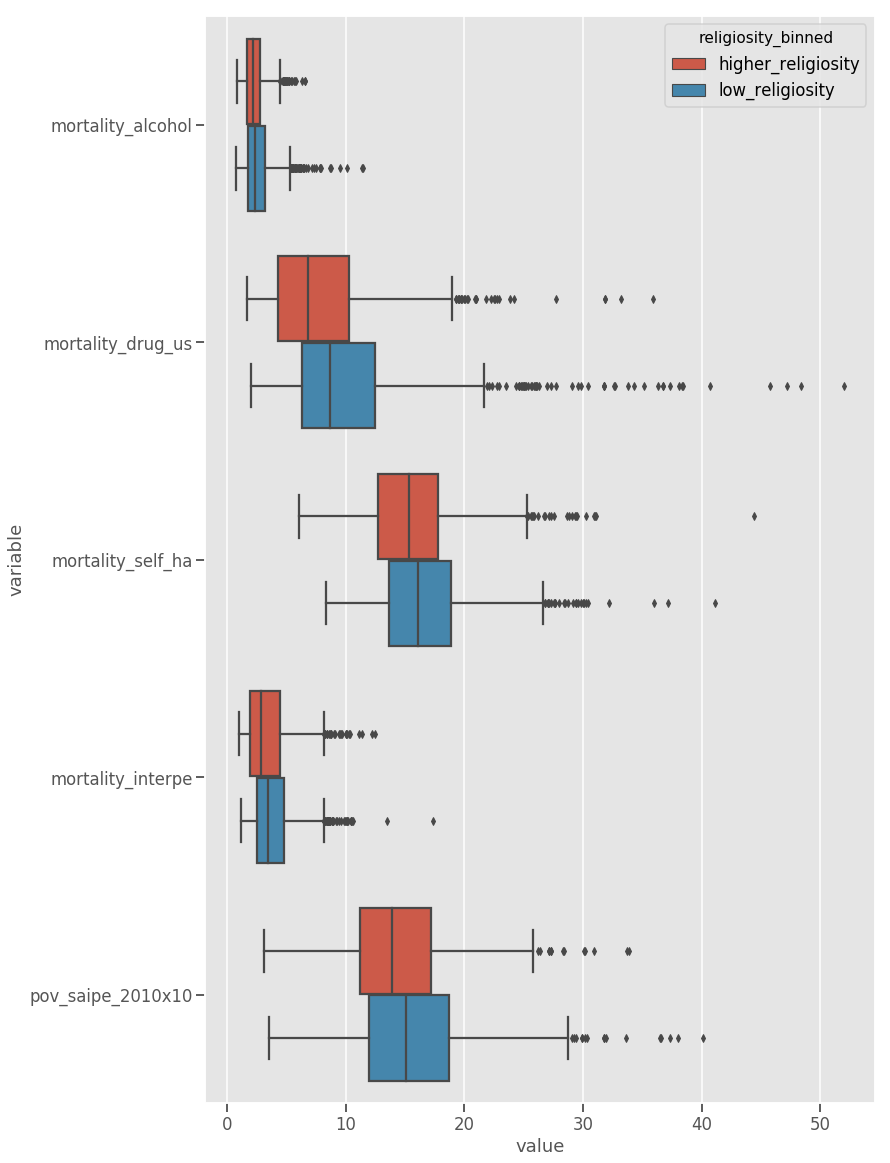

In [189]:
# Best counties (by religiosity)
t = (
    data.assign(
        religiosity_binned=np.where(
            data.religiosity < 0.5, "low_religiosity", "higher_religiosity"
        ),
        pov_saipe_2010x10=data.pov_saipe_2010 * 100,
    )
    [
        [
            "religiosity_binned",
            "mortality_alcohol",
            "mortality_drug_us",
            "mortality_self_ha",
            "mortality_interpe",
            "pov_saipe_2010x10",
        ]
    ]
    .sample(2000)
    .melt(id_vars="religiosity_binned")
)
plt.figure(figsize=(12, 20))
sns.boxplot(y="variable", x="value", hue="religiosity_binned", data=t)
